<a href="https://colab.research.google.com/github/SebasVasconez/Proyecto2/blob/main/Proyecto_2_Spaceship_Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CODING DOJO**
##Creado por: Sebastian Vasconez

* Fecha creado: 07/04/2023
* Fecha actualizacion: 08/04/2023
* Descripcion: Proyecto 2: Spaceship Titanic


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

In [2]:
test=pd.read_csv('/content/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [4]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [5]:
train=pd.read_csv('/content/train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
#Revision de duplicados
train.duplicated().value_counts()

False    8693
dtype: int64

In [9]:
#Revision de faltantes
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [12]:
#Revision de inconsistencias en variables categoricas
train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [13]:
train["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [14]:
train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [15]:
train["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [16]:
train["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [17]:
train['Group'] = train['PassengerId'].apply(lambda x: str(x)[:4])
train['TotalSpend'] = train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
train['Deck'] = train['Cabin'].apply(lambda x: str(x)[:1])
train['Side'] = train['Cabin'].apply(lambda x: str(x)[-1:])
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,TotalSpend,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,0.0,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,736.0,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,10383.0,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,5176.0,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1091.0,F,S


In [18]:
test['Group'] = test['PassengerId'].apply(lambda x: str(x)[:4])
test['TotalSpend'] = test['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
test['Deck'] = test['Cabin'].apply(lambda x: str(x)[:1])
test['Side'] = test['Cabin'].apply(lambda x: str(x)[-1:])
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,TotalSpend,Deck,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,0.0,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,627.0,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,10340.0,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,5176.0,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,798.0,F,S


In [19]:
train[['CryoSleep','VIP', 'RoomService' ,'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpend']] = train[['CryoSleep','VIP','RoomService' , 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpend']].fillna(value=0)
test[['CryoSleep','VIP', 'RoomService' ,'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpend']] = test[['CryoSleep','VIP','RoomService' , 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpend']].fillna(value=0)

In [20]:
#eliminacion columnas innecesarias
train = train.drop(columns=['Name'])
test = test.drop(columns=['Name'])

In [21]:
train["Transported"] = train["Transported"].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)

test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)

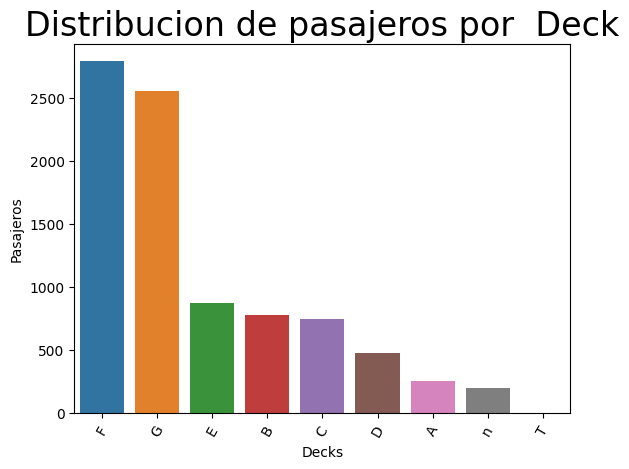

In [22]:
#Distribucion de pasajeros por  Deck
Decks=train["Deck"].value_counts()
sns.barplot(x=Decks.index, y=Decks.values)
plt.title('Distribucion de pasajeros por  Deck', fontsize=24)
plt.xticks(rotation=60)
plt.xlabel('Decks')
plt.ylabel('Pasajeros')
sns.color_palette("Paired")
plt.show()

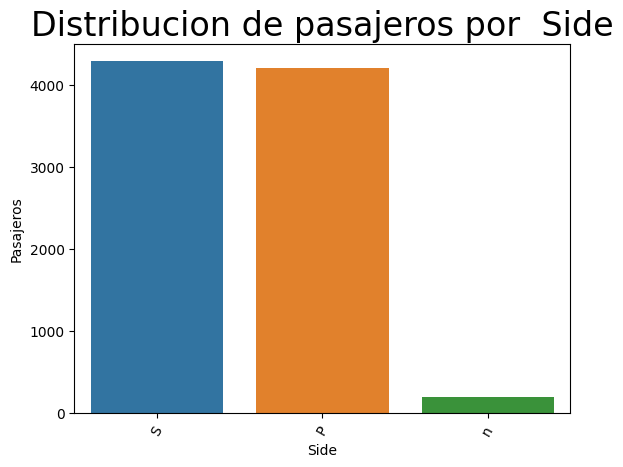

In [23]:
#Distribucion de pasajeros por  Side
Decks=train["Side"].value_counts()
sns.barplot(x=Decks.index, y=Decks.values)
plt.title('Distribucion de pasajeros por  Side', fontsize=24)
plt.xticks(rotation=60)
plt.xlabel('Side')
plt.ylabel('Pasajeros')
sns.color_palette("Paired")
plt.show()

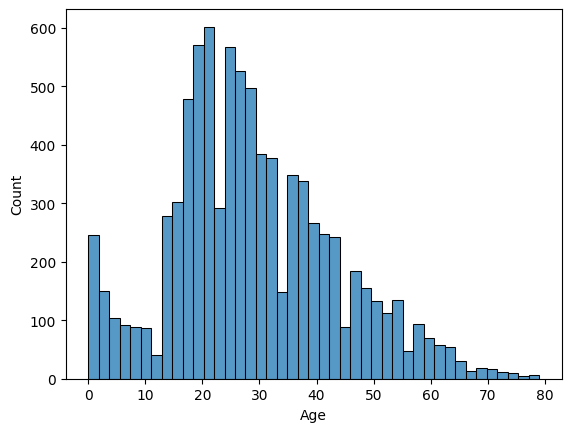

In [24]:
#Distribución Edad
sns.histplot(train['Age'])
sns.color_palette("Paired")
plt.show()


<Axes: >

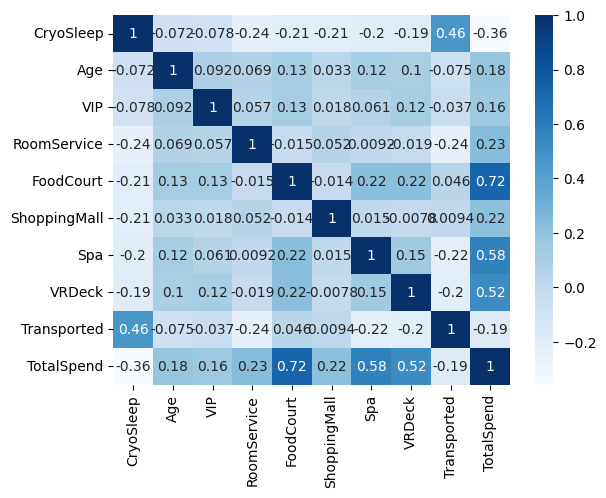

In [94]:
sns.heatmap(train.corr(numeric_only=True), annot = True, cmap = "Blues")

In [26]:
# El objetivo que intentamos predecir.
y = train['Transported']
# Las características que se usarán para hacer la predicción
X = train.drop(columns = 'Transported')

#2)
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=None)

In [96]:
from sklearn.pipeline import make_pipeline
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=None))])

In [97]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86e52aee30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=None))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86e52af280>)])

In [98]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86e52aee30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=None))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86e52af280>)])

In [31]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [32]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('')
print('shape of data is', X_train_processed.shape)

0 missing values in training data
0 missing values in testing data

All data in X_train_processed are float64
All data in X_test_processed are float64

shape of data is (6519, 16655)


In [33]:
col=preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train_processed, columns=col)
X_test = pd.DataFrame(X_test_processed, columns=col)

In [34]:
X_train.head()

,pipeline-1__CryoSleep,pipeline-1__Age,pipeline-1__VIP,pipeline-1__RoomService,pipeline-1__FoodCourt,pipeline-1__ShoppingMall,pipeline-1__Spa,pipeline-1__VRDeck,pipeline-1__TotalSpend,pipeline-2__PassengerId_0002_01,...,pipeline-2__Deck_C,pipeline-2__Deck_D,pipeline-2__Deck_E,pipeline-2__Deck_F,pipeline-2__Deck_G,pipeline-2__Deck_T,pipeline-2__Deck_n,pipeline-2__Side_P,pipeline-2__Side_S,pipeline-2__Side_n
0,-0.726479,-0.128904,-0.150827,0.332711,-0.286593,0.368202,0.146054,-0.257499,-0.011933,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.376503,1.125450,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,-0.491660,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.376503,1.473882,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,-0.491660,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.376503,-1.940748,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,-0.491660,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.726479,0.916391,-0.150827,-0.326765,-0.268169,0.237856,0.112691,-0.219049,-0.189311,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
X_test.head()

,pipeline-1__CryoSleep,pipeline-1__Age,pipeline-1__VIP,pipeline-1__RoomService,pipeline-1__FoodCourt,pipeline-1__ShoppingMall,pipeline-1__Spa,pipeline-1__VRDeck,pipeline-1__TotalSpend,pipeline-2__PassengerId_0002_01,...,pipeline-2__Deck_C,pipeline-2__Deck_D,pipeline-2__Deck_E,pipeline-2__Deck_F,pipeline-2__Deck_G,pipeline-2__Deck_T,pipeline-2__Deck_n,pipeline-2__Side_P,pipeline-2__Side_S,pipeline-2__Side_n
0,-0.726479,-0.686394,-0.150827,0.296821,-0.064870,0.754351,-0.275948,0.645628,0.409889,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.726479,-0.756081,-0.150827,-0.320784,0.287726,-0.278640,-0.278653,-0.256644,-0.158527,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.376503,0.846705,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,-0.491660,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.726479,0.428587,-0.150827,-0.326765,-0.071858,0.431745,-0.278653,-0.257499,-0.491660,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.376503,0.986077,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,-0.491660,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
#Corrección de titulos
col= X_train.columns
coln = [i[12:] for i in col]
X_train.columns = coln
X_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'TotalSpend', 'PassengerId_0002_01',
       ...
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_n',
       'Side_P', 'Side_S', 'Side_n'],
      dtype='object', length=16655)

In [37]:
col2= X_test.columns
coln2 = [j[12:] for j in col2]
X_test.columns = coln2
X_test.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'TotalSpend', 'PassengerId_0002_01',
       ...
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_n',
       'Side_P', 'Side_S', 'Side_n'],
      dtype='object', length=16655)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=10)

In [39]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
y_pred = rfc.predict(X_test_processed)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7359705611775529


In [42]:
Y_test= preprocessor.transform(test)

col2=preprocessor.get_feature_names_out()
Y_test2 = pd.DataFrame(Y_test, columns=col)

col2= Y_test2.columns
coln2 = [j[12:] for j in col2]
Y_test2.columns = coln2
Y_test2.columns

Y_test2

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,PassengerId_0002_01,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_n,Side_P,Side_S,Side_n
0,1.376503,-1.289039e-01,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,-0.491660,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.726479,-6.863945e-01,-0.150827,-0.326765,-0.280875,-0.278640,2.266886,-0.257499,-0.261875,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.376503,1.498414e-01,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,3.297776,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.726479,6.376457e-01,-0.150827,-0.326765,3.939481,-0.278640,-0.115443,0.242340,1.405257,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.726479,-6.167081e-01,-0.150827,-0.311811,-0.286593,0.755981,-0.278653,-0.257499,-0.199206,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.376503,3.589004e-01,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,0.101676,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4273,-0.726479,9.163910e-01,-0.150827,-0.326765,0.251514,-0.250942,-0.269636,-0.134461,-0.491660,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4274,1.376503,-2.475756e-16,-0.150827,-0.326765,-0.286593,-0.278640,-0.278653,-0.257499,0.288583,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4275,-0.726479,-2.475756e-16,-0.150827,-0.326765,1.416034,-0.278640,-0.278653,0.189365,1.609388,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
y_Final = rfc.predict(Y_test2)
y_Final

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 0, 1])

In [44]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_Final})
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,0


In [45]:
submission['Transported'] = submission['Transported'].replace(1, True)
submission['Transported'] = submission['Transported'].replace(0, False)
submission.to_csv('submission.csv',index=False)

Kaggle Score: 0.75263

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_processed, y_train)

GradientBoostingClassifier()

In [48]:
print('Training accuracy:', gbc.score(X_train, y_train))
print('Testing accuracy:', gbc.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Training accuracy: 0.811934345758552
Testing accuracy: 0.7842686292548298


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [49]:
y_Final2 = gbc.predict(Y_test2)
y_Final2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 1])

In [50]:
submission2 = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_Final2})
submission2

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [51]:
submission2['Transported'] = submission2['Transported'].replace(1, True)
submission2['Transported'] = submission2['Transported'].replace(0, False)

In [ ]:
submission2.to_csv('submission2.csv',index=False)

Kaggle Score: 0.80453


Mediante el Gradient Boosting se logró obtener un acierto de 80.45% de las predicciones. Es decir el modelo se asemeja bastante a los datos reales.

In [52]:
input_shape = X_train_processed.shape[1]
input_shape

16655

Epoch 1/2
204/204 [==============================] - 978s 5s/step - loss: 0.4481 - val_loss: 0.4227
Epoch 2/2
204/204 [==============================] - 960s 5s/step - loss: 0.1166 - val_loss: 0.5791


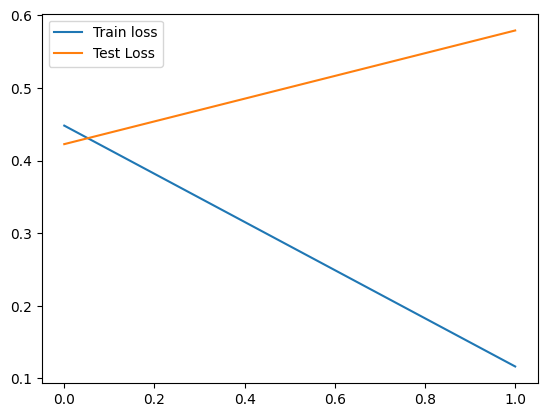

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(16655, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Third hidden layer
#model.add(Dense(10, # How many neurons you have in your third hidden layer
#                activation = 'relu')) # What activation function are you using?

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=2)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [70]:
y_Final3 = model.predict(Y_test2)
y_Final3

134/134 [==============================] - 67s 502ms/step


array([[0.34829226],
       [0.0016375 ],
       [0.9958569 ],
       ...,
       [0.96459067],
       [0.83010656],
       [0.49881598]], dtype=float32)

In [77]:
y_pred3_binary = np.where(y_Final3 >= 0.5, 1, 0)
y_pred3_binary

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [78]:
y_pred3_binary=pd.DataFrame(y_pred3_binary)
y_pred3_binary

,0
0,0
1,0
2,1
3,1
4,1
...,...
4272,0
4273,0
4274,1
4275,1


In [82]:
submission3 = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred3_binary[0]})
submission3

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,0
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [85]:
submission3['Transported'] = submission3['Transported'].replace(1, True)
submission3['Transported'] = submission3['Transported'].replace(0, False)
submission3.to_csv('submission3.csv',index=False)

In [90]:
y_pred3_binary2 = np.where(y_Final3 >= 0.3, 1, 0)
y_pred3_binary2=pd.DataFrame(y_pred3_binary2)

submission4 = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred3_binary2[0]})

submission4['Transported'] = submission4['Transported'].replace(1, True)
submission4['Transported'] = submission4['Transported'].replace(0, False)
submission4.to_csv('submission4.csv',index=False)

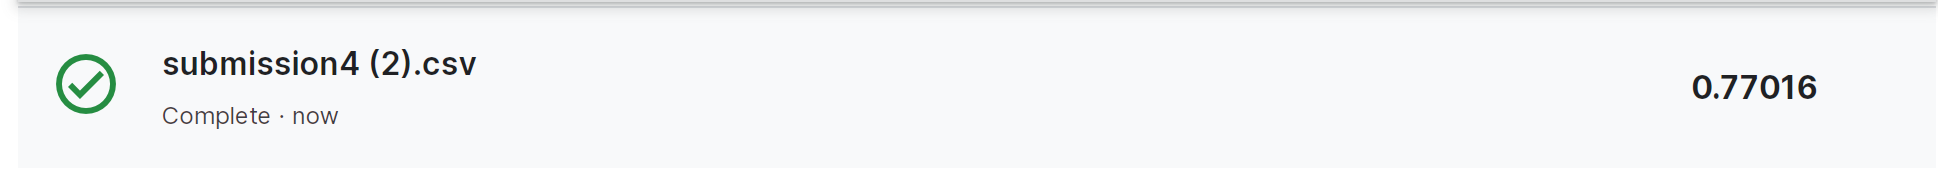

In [ ]:
from sklearn.metrics import roc_curve, auc

# Hacer predicciones con el modelo
#y_pred = model.predict(X)
y_Final3 = model.predict(X_train)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_train, y_Final3)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Encontrar el punto óptimo en la curva ROC
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Umbral óptimo:", optimal_threshold)